# Exploratory Data Analysis 

We first examine the distribution of the mean and inner-album variance for each audio feature of our selected Hip hop artists, and then take a deeper dive into some specific audio features.

In [2]:
# Standrard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Import data gathering function
import data_preparation as dp

# Pull in data, exclude non-audio features in one dataframe
df = pd.read_csv('.//Data//artist_static_data_2.csv')
df = df.set_index('artist')
df_audio = df.loc[:, ~df.columns.isin(['av_time_btwn_release', 'total_albums', 
                                       'track_per_album', 'classic'])]

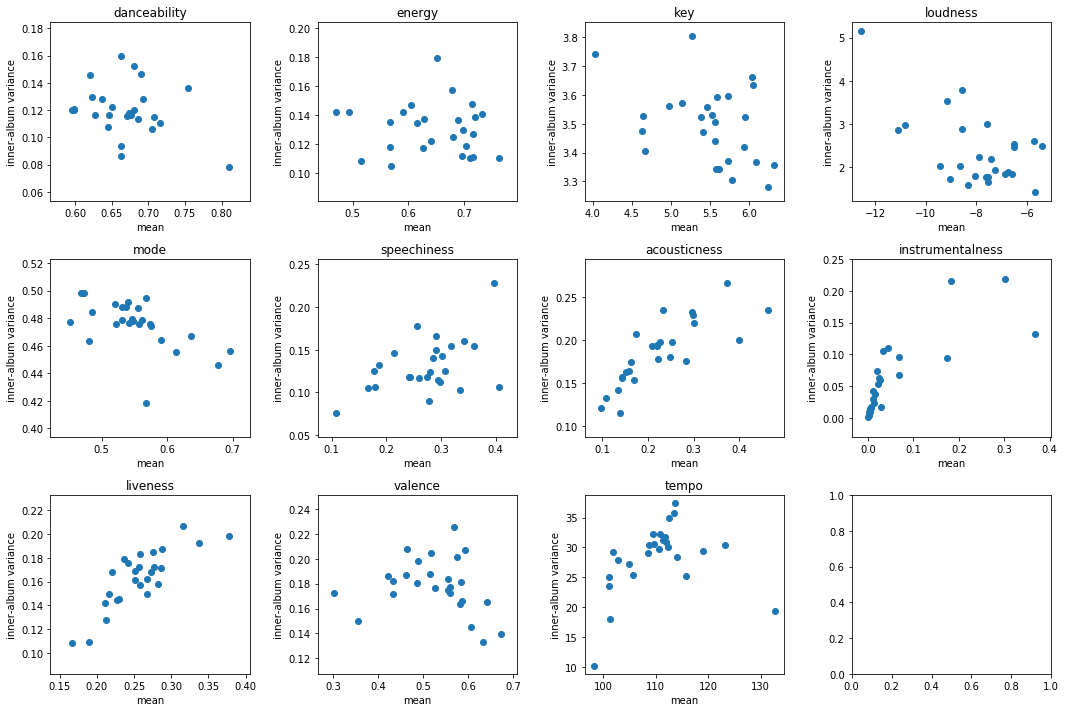

In [3]:
# Pairs Plots for mean and inner-album variance of audio features for each artist
fig, axs = plt.subplots(3,4, figsize=(15, 10))
axs = axs.ravel()
for ii in range(int((df_audio.shape[1] / 2))):
    feat_name = df_audio.iloc[:, ii*2].name.rsplit(' ', 1)[0]
    axs[ii].scatter(df_audio.iloc[:, ii*2], df_audio.iloc[:, ii*2+1])
    axs[ii].set_title(feat_name)
    axs[ii].set_xlabel('mean')
    axs[ii].set_ylabel('inner-album variance')
plt.tight_layout()

### Instrumentalness

In [4]:
# Who are the artists with a higher degree of instrumentalness?
instrum = pd.DataFrame(df_audio.loc[:, 'instrumentalness mean'].sort_values(ascending = False).head(10))
instrum = instrum.reset_index()
instrum.columns = ['Artist', 'Instrumentalness Mean']
display(HTML(instrum.to_html(index = False)))

Artist,Instrumentalness Mean
De La Soul,0.367014
MF DOOM,0.302491
Cypress Hill,0.183039
Dr. Dre,0.174406
Common,0.068316
Wu-Tang Clan,0.068019
A Tribe Called Quest,0.043426
BROCKHAMPTON,0.032693
Snoop Dog,0.027464
SZA,0.025689


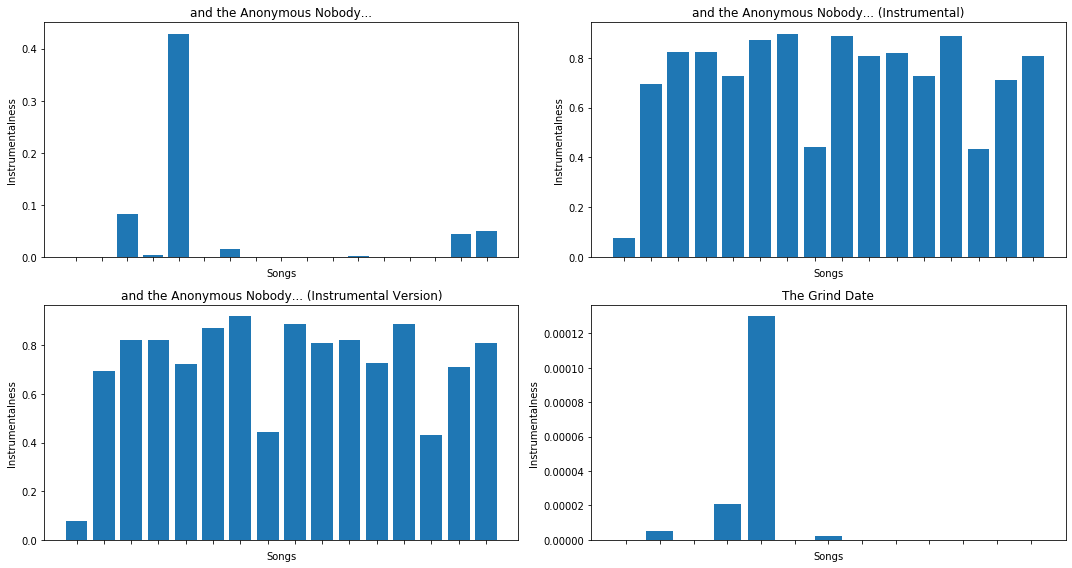

In [5]:
# De La Soul
fig, axs = plt.subplots(2,2, figsize=(15, 8))
axs = axs.ravel()
de_la_soul = dp.Artist('De La Soul', 'spotify:artist:1Z8ODXyhEBi3WynYw0Rya6')
de_la_soul_albums = de_la_soul.album_track_summary
ii = 0
for album, album_df in de_la_soul_albums.items():
    axs[ii].bar(x = album_df.index, height = album_df.loc[:, 'instrumentalness'].values)
    axs[ii].xaxis.set_ticklabels([])
    axs[ii].set_title(album)
    axs[ii].set_xlabel('Songs')
    axs[ii].set_ylabel('Instrumentalness')
    ii = ii + 1
plt.tight_layout()
    

In [7]:
# MF Doom
mf_doom = dp.Artist('MF DOOM', 'spotify:artist:2pAWfrd7WFF3XhVt9GooDL')

# Average instumentalness by album
doom_albums = mf_doom.album_track_summary
av_instrum = pd.Series(index = doom_albums, dtype = 'float64')
for key, value in doom_albums.items():
    instrum_means = value.loc[:, 'instrumentalness'].mean()
    av_instrum.loc[key] = instrum_means

# Display average instrumentalness by album
av_instrum = pd.DataFrame(av_instrum)
av_instrum = av_instrum.reset_index()
av_instrum.columns = ['Album', 'Average Instrumentalness']
display(HTML(av_instrum.to_html(index = False)))

Album,Average Instrumentalness
NEHRUVIANDOOM (REDUX),0.003673
BORN LIKE THIS (Redux),0.087672
Czarface Meets Metal Face,0.120325
Czarface Meets Metal Face (Instrumentals),0.726879
Operation: Doomsday (Complete),0.206748
Expektoration... Live,0.041667
Gazzillion Ear,0.364778
BORN LIKE THIS,0.090038
"Metal Fingers Presents: Special Herbs, The Box Set Vol. 0 - 9",0.697451
Special Herbs + Spices Volume One,0.000100


The high degree of instrumentalness in the instrumental versions of De La Soul's studio albums greatly skews their instrumentalness score upward. It is especially skewed as 2 of their 4 recorded album's on Spotify are instrumental. MF Doom's instrumental score is also affected by this phenomenon, particularly in his Metal Fingers Presents series. To account for this, we exclude instumentalness from our clustering analysis.

### Acousticness

In [138]:
#Who are the artists with a higher degree of acousticness?
acoust = pd.DataFrame(df_audio.loc[:, 'acousticness mean'].sort_values(ascending = False).head(10))
acoust = acoust.reset_index()
acoust.columns = ['Artist', 'Acousticness Mean']
display(HTML(acoust.to_html(index = False)))

Artist,Acousticness Mean
Smino,0.461739
Lauryn Hill,0.399717
BROCKHAMPTON,0.373213
JID,0.300298
J. Cole,0.298418
SZA,0.295687
Common,0.283837
Kendrick Lamar,0.251702
Mos Def,0.247155
Outkast,0.232282


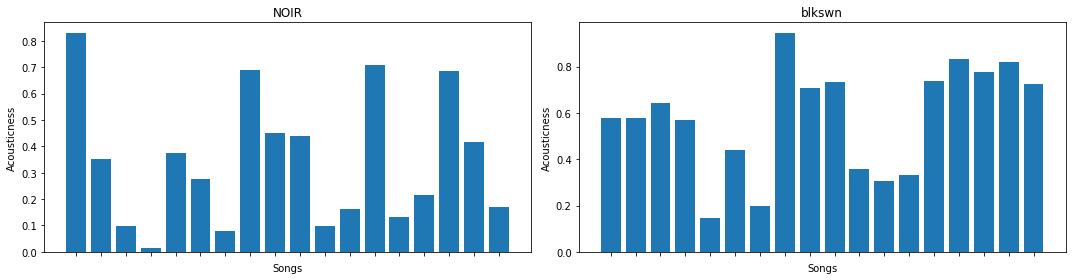

In [52]:
# Smino
smino = dp.Artist('Smino', 'spotify:artist:1ybINI1qPiFbwDXamRtwxD')
smino_albums = smino.album_track_summary

fig, axs = plt.subplots(1,2, figsize=(15, 4))
axs = axs.ravel()
ii = 0
for album, album_df in smino_albums.items():
    axs[ii].bar(x = album_df.index, height = album_df.loc[:, 'acousticness'].values)
    axs[ii].xaxis.set_ticklabels([])
    axs[ii].set_title(album)
    axs[ii].set_xlabel('Songs')
    axs[ii].set_ylabel('Acousticness')
    ii = ii + 1
plt.tight_layout()

We see a much more even distribution in the acousticness of Smino's music relative to the instrumentalness of artists with instrumental albums, albeit with some outliers in NOIR, which we hope to capture distributionally with the inner album variance of acousticness variable in our clustering.

### Energy

In [42]:
# Artists with the most energy
energy = pd.DataFrame(df_audio.loc[:, 'energy mean'].sort_values(ascending = False)).head(10)
energy = energy.reset_index()
energy.columns = ['Artist', 'Energy Mean']
display(HTML(energy.to_html(index = False)))

Artist,Energy Mean
Jay-Z,0.761678
Logic,0.730904
Dr. Dre,0.719396
Naughty by Nature,0.715876
Nas,0.715131
The Notorious B.I.G.,0.713826
Tupac,0.710904
Mos Def,0.703158
Snoop Dog,0.697600
Wu-Tang Clan,0.696574


In [48]:
# Are new artists higher energy
energy_comp = pd.DataFrame(index = ['Contemporary', 'Classic'])
energy_classic = df.loc[:, ('energy mean', 'classic')]
classic_arts = energy_classic[energy_classic['classic'] == True]
new_arts = energy_classic[energy_classic['classic'] == False]
energy_comp.loc['Classic', 'Mean'] = classic_arts['energy mean'].mean()
energy_comp.loc['Contemporary', 'Mean'] = new_arts['energy mean'].mean()
energy_comp = energy_comp.reset_index()
energy_comp.columns = ['Artist Type', 'Energy Mean']
display(HTML(energy_comp.to_html(index = False)))

Artist Type,Energy Mean
Contemporary,0.599766
Classic,0.657576


In [16]:
# Nas' music feels low energy
nas = dp.Artist('Nas', 'spotify:artist:20qISvAhX20dpIbOOzGK3q')
nas_albums = nas.album_track_summary

# Energy by album
nas_energy_by_album = pd.DataFrame(columns = ['Average Energy'])
for key, value in nas_albums.items():
    nas_energy_by_album.loc[key, 'Average Energy'] = value.loc[:, 'energy'].mean()

# Most popular albums
nas_enegy_by_album = nas_energy_by_album.reset_index()
nas_energy = nas_energy_by_album.loc[('Illmatic', 'Stillmatic', 'King\'s Disease'), :].copy()
nas_energy = nas_energy.reset_index()
nas_energy.columns = ['Album', 'Average Energy']
display(HTML(nas_energy.to_html(index = False)))

Album,Average Energy
Illmatic,0.7523
Stillmatic,0.801357
King's Disease,0.745769


### Danceability

Text(0.5, 1.0, 'Average Artist Danceability vs Energy')

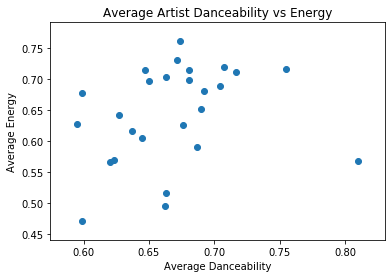

In [21]:
# Is Danceability correlated with Energy?
d_e = df_audio.loc[:, ('danceability mean', 'energy mean')]
plt.scatter(x = d_e.loc[:, 'danceability mean'], y = d_e.loc[:, 'energy mean'])
plt.ylabel('Average Energy')
plt.xlabel('Average Danceability')
plt.title('Average Artist Danceability vs Energy')
for i, txt in enumerate(d_e.shape[0]):
    a

In [28]:
# Who is the artists with high danceability but realtively low energy?
dance_max = d_e[d_e['danceability mean'] == d_e['danceability mean'].max()]
dance_max = dance_max.reset_index()
dance_max.columns = ['Artist', 'Average Danceability', 'Average Energy']
display(HTML(dance_max.to_html(index = False)))

Artist,Average Danceability,Average Energy
A Tribe Called Quest,0.809967,0.566955


### Tempo

In [39]:
# Artists with high tempo
high_tempo = df_audio.loc[:, 'tempo mean'].sort_values(ascending = False).head(5) # newer artists have higher tempos
high_tempo = high_tempo.reset_index()
high_tempo.columns = ['Artist', 'Average Tempo']
display(HTML(high_tempo.to_html(index = False)))

Artist,Average Tempo
Travis Scott,132.760565
Logic,123.236127
Kendrick Lamar,118.964514
SZA,115.739833
BROCKHAMPTON,114.114599


In [41]:
# Artists with high tempo vol
tempo_vol = df_audio.loc[:, 'tempo vol'].sort_values(ascending = False).head(5) # artists with higher tempo vol
tempo_vol = tempo_vol.reset_index()
tempo_vol.columns = ['Artist', 'Average Tempo']
display(HTML(tempo_vol.to_html(index = False)))

Artist,Average Tempo
The Notorious B.I.G.,37.366656
Lauryn Hill,35.766763
Smino,34.944778
MF DOOM,32.278630
Mobb Deep,32.208939
